# Dual Momentum Sector Rotation (DMSR)

'Relative momentum looks at price strength with respect to other assets.
Absolute momentum uses an asset’s own past performance to infer future
performance. Absolute momentum can reduce downside exposure as well
enhance returns. The best approach is to use both types of momentum
together. That is what dual momentum is all about.'  
https://www.optimalmomentum.com/momentum/

**Buy Signal**: When the S&P 500 is above its 10-month simple moving average, buy the sectors with the biggest gains over a three-month timeframe and (optionally) has positive absolute momentum.

**Sell Signal**: (Optionally) Exit all positions when the S&P 500 moves below its 10-month simple moving average on a monthly closing basis, or (optionaly) exit a single position if it has negative absolute momentum.

**Rebalance**: Once per month, sell sectors that fall out of the top tier (three) and buy the sectors that move into the top tier (two or three).

https://school.stockcharts.com/doku.php?id=trading_strategies:sector_rotation_roc  
https://robotwealth.com/dual-momentum-review/  

You can reproduce the results on robowealth by setting the 'end' date to (2017, 1, 1).  You can also note that these methods have NOT done so well since 2018, and especially didn't handle the COVID downturn very well.

In [1]:
import datetime

import matplotlib.pyplot as plt
import pandas as pd

import pinkfish as pf
import strategy

# Format price data.
pd.options.display.float_format = '{:0.2f}'.format

%matplotlib inline

In [2]:
# Set size of inline plots.
'''note: rcParams can't be in same cell as import matplotlib
   or %matplotlib inline
   
   %matplotlib notebook: will lead to interactive plots embedded within
   the notebook, you can zoom and resize the figure
   
   %matplotlib inline: only draw static images in the notebook
'''
plt.rcParams["figure.figsize"] = (10, 7)

Some global data

In [3]:
SP500_Sectors = ['SPY', 'XLB', 'XLE', 'XLF', 'XLI', 'XLK', 'XLP', 'XLU', 'XLV', 'XLY']

Other_Sectors = ['RSP', 'DIA', 'IWM', 'QQQ', 'DAX', 'EEM', 'TLT', 'GLD', 'XHB']

Diversified_Assets = ['SPY', 'TLT', 'NLY', 'GLD']

Diversified_Assets_Reddit = ['IWB', 'IEV', 'EWJ', 'EPP', 'IEF', 'SHY', 'GLD']

Robot_Dual_Momentum_Equities = ['SPY', 'CWI']

Robot_Dual_Momentum_Bonds = ['CSJ', 'HYG']

Robot_Dual_Momentum_Equities_Bonds = ['SPY', 'AGG']

Robot_Wealth = ['IWM', 'SPY', 'VGK', 'IEV', 'EWJ', 'EPP', 'IEF', 'SHY', 'GLD']


# Pick one of the above
symbols = SP500_Sectors

capital = 10000
start = datetime.datetime(2007, 1, 1)
#start = datetime.datetime(*pf.SP500_BEGIN)
end = datetime.datetime.now()
#end = datetime.datetime(2019, 12, 1)

In [4]:
options = {
    'use_adj' : True,
    'use_cache' : True,
    'lookback': 6,
    'margin': 1,
    'use_absolute_mom': False,
    'use_regime_filter': False,
    'top_tier': 2
    #'top_tier': int(len(symbols)/2)
}
options

{'use_adj': True,
 'use_cache': True,
 'lookback': 6,
 'margin': 1,
 'use_absolute_mom': False,
 'use_regime_filter': False,
 'top_tier': 2}

Run Strategy

In [5]:
s = strategy.Strategy(symbols, capital, start, end, options)
s.run()

View logs

In [6]:
s.rlog.head()

,date,seq_num,price,shares,entry_exit,direction,symbol
0,2007-07-02,0,47.70,104,entry,LONG,XLE
1,2007-07-02,1,30.22,165,entry,LONG,XLB
2,2007-08-01,2,29.75,1,entry,LONG,XLI
3,2007-08-01,3,46.76,1,exit,LONG,XLE
4,2007-08-01,4,29.12,165,exit,LONG,XLB


In [7]:
s.tlog.tail()

,entry_date,entry_price,exit_date,exit_price,pl_points,pl_cash,qty,cumul_total,direction,symbol
265,2021-02-01,29.20,2021-03-01,33.17,3.97,79.45,20,10739.25,LONG,XLF
266,2021-02-01,29.20,2021-04-01,34.47,5.27,10.54,2,10749.79,LONG,XLF
267,2021-02-01,29.20,2021-04-09,35.15,5.95,1963.31,330,12713.10,LONG,XLF
268,2021-03-01,48.88,2021-04-09,48.19,-0.69,-145.88,211,12567.22,LONG,XLE
269,2021-04-01,50.31,2021-04-09,48.19,-2.12,-29.68,14,12537.54,LONG,XLE


In [8]:
s.dbal.tail()

,high,low,close,shares,cash,leverage,state
date,,,,,,,
2021-04-05,22609.71,22609.71,22609.71,555,95.76,1.00,-
2021-04-06,22557.36,22557.36,22557.36,555,95.76,1.00,-
2021-04-07,22651.71,22651.71,22651.71,555,95.76,1.00,-
2021-04-08,22511.01,22511.01,22511.01,555,95.76,1.00,-
2021-04-09,22537.54,22537.54,22537.54,0,22537.54,1.00,X


Generate strategy stats - display all available stats

In [9]:
pf.print_full(s.stats)

start                                                   2007-06-11
end                                                     2021-04-09
beginning_balance                                            10000
ending_balance                                            22537.54
total_net_profit                                          12537.54
gross_profit                                              24791.01
gross_loss                                               -12253.47
profit_factor                                                 2.02
return_on_initial_capital                                   125.38
annual_return_rate                                            6.05
trading_period                           13 years 9 months 29 days
pct_time_in_market                                           98.97
margin                                                           1
avg_leverage                                                  1.00
max_leverage                                                  

Run Benchmark, Retrieve benchmark logs, and Generate benchmark stats

In [10]:
benchmark = pf.Benchmark('SPY', s.capital, s.start, s.end, use_adj=True)
benchmark.run()

Plot Equity Curves: Strategy vs Benchmark

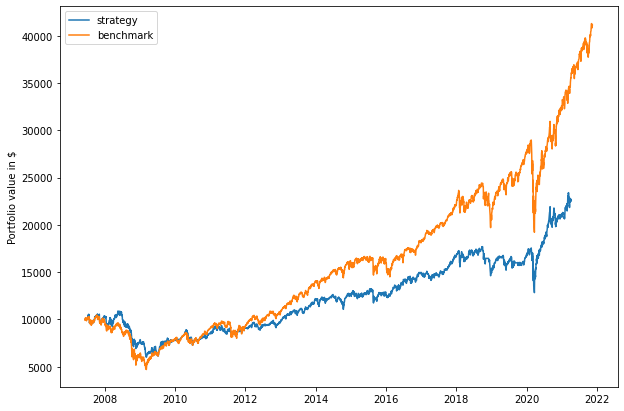

In [11]:
pf.plot_equity_curve(s.dbal, benchmark=benchmark.dbal)

Bar Graph: Strategy vs Benchmark

,strategy,benchmark
annual_return_rate,6.05,10.30
max_closed_out_drawdown,-44.97,-55.03
annualized_return_over_max_drawdown,0.13,0.19
best_month,24.98,23.47
worst_month,-24.11,-30.95
sharpe_ratio,0.41,0.58
sortino_ratio,0.51,0.70
monthly_std,4.37,4.78
annual_std,14.04,17.47


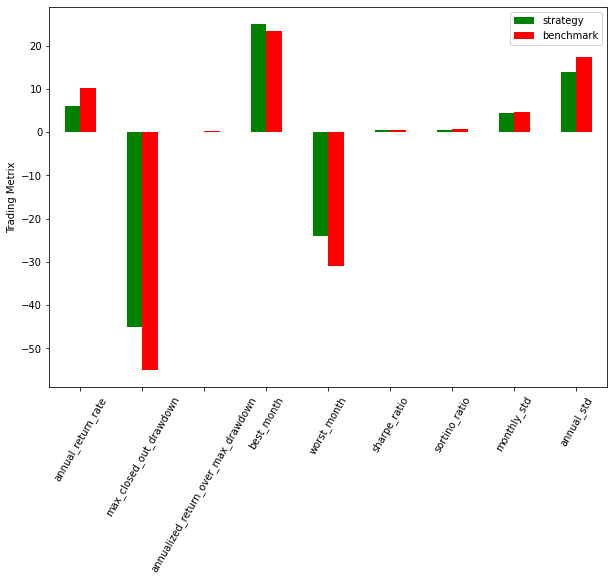

In [12]:
df = pf.plot_bar_graph(s.stats, benchmark.stats)
df